Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [16]:
import pandas as pd

# Load the data (assuming the files are in the same directory)
df_bike_stations = pd.read_csv('paris_bike_stations.csv')
df_yelp = pd.read_csv('yelp_nearby_places.csv')
df_foursquare = pd.read_csv('foursquare_nearby_places.csv')

# Merge the datasets on 'station_name'
# Merging df_bike_stations with df_yelp and df_foursquare
combined_data_yelp = pd.merge(df_bike_stations, df_yelp, on='station_name', how='inner')
combined_data_foursquare = pd.merge(df_bike_stations, df_foursquare, on='station_name', how='inner')

# Check the merged data (print first few rows)
print(combined_data_yelp.head())
print(combined_data_foursquare.head())

# Combine both Yelp and Foursquare merged data into a single dataframe
combined_data = pd.concat([combined_data_yelp, combined_data_foursquare], ignore_index=True)

# Check the final combined dataset
print(combined_data.head())
# Save the combined data to a CSV file
combined_data.to_csv('combined_bike_poi_data.csv', index=False)

# Confirm the file is saved
print("The combined data has been saved to 'combined_bike_poi_data.csv'.")


         station_name   latitude  longitude  free_bikes  \
0  Argenson - Château  48.888559     2.2642          20   
1  Argenson - Château  48.888559     2.2642          20   
2  Argenson - Château  48.888559     2.2642          20   
3  Argenson - Château  48.888559     2.2642          20   
4  Argenson - Château  48.888559     2.2642          20   

           business_name  rating  \
0             Bustronome     4.5   
1  La Table des Oliviers     4.3   
2      Léon de Bruxelles     3.9   
3             FrogBurger     4.5   
4   Le Chalet de Neuilly     4.0   

                                             address     distance  \
0               2 avenue Kléber, 75116 Paris, France  2800.624423   
1  4 rue de l'Eglise, 92200 Neuilly Sur Seine, Fr...   419.710528   
2  95 boulevard Gouvion Saint Cyr, 75017 Paris, F...  1845.469007   
3  150 avenue Charles de Gaulle, 92200 Neuilly-su...   478.621497   
4  14 Rue du Commandant Pilot, 92200 Neuilly-sur-...  1295.350109   

        categ

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

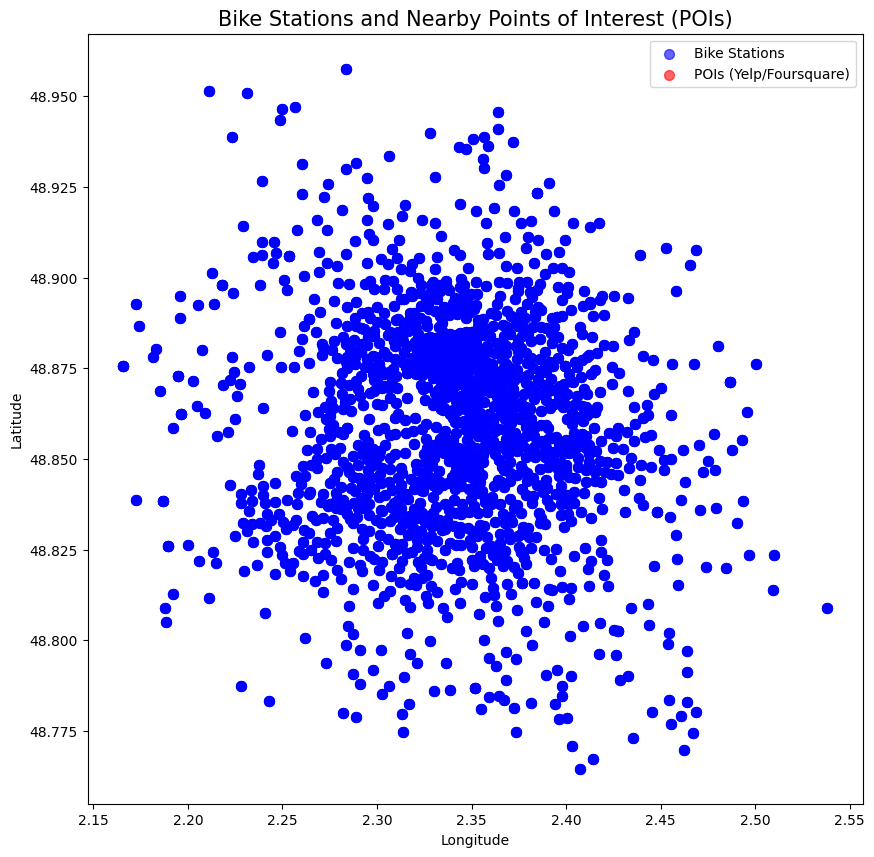

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load combined data (this should be the merged dataset from previous steps)
combined_data = pd.read_csv('combined_bike_poi_data.csv')

# Extract bike stations data
bike_stations = combined_data[['station_name', 'latitude', 'longitude']].dropna()

# Extract POIs (Yelp/Foursquare) data
pois = combined_data[['venue_name', 'venue_latitude', 'venue_longitude']].dropna()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot bike stations in blue (o = circle marker)
ax.scatter(bike_stations['longitude'], bike_stations['latitude'], color='blue', label='Bike Stations', alpha=0.6, s=50)

# Plot POIs (Yelp/Foursquare) in red (x = cross marker)
ax.scatter(pois['venue_longitude'], pois['venue_latitude'], color='red', label='POIs (Yelp/Foursquare)', alpha=0.6, s=50)

# Add title and labels
ax.set_title('Bike Stations and Nearby Points of Interest (POIs)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Display the plot
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

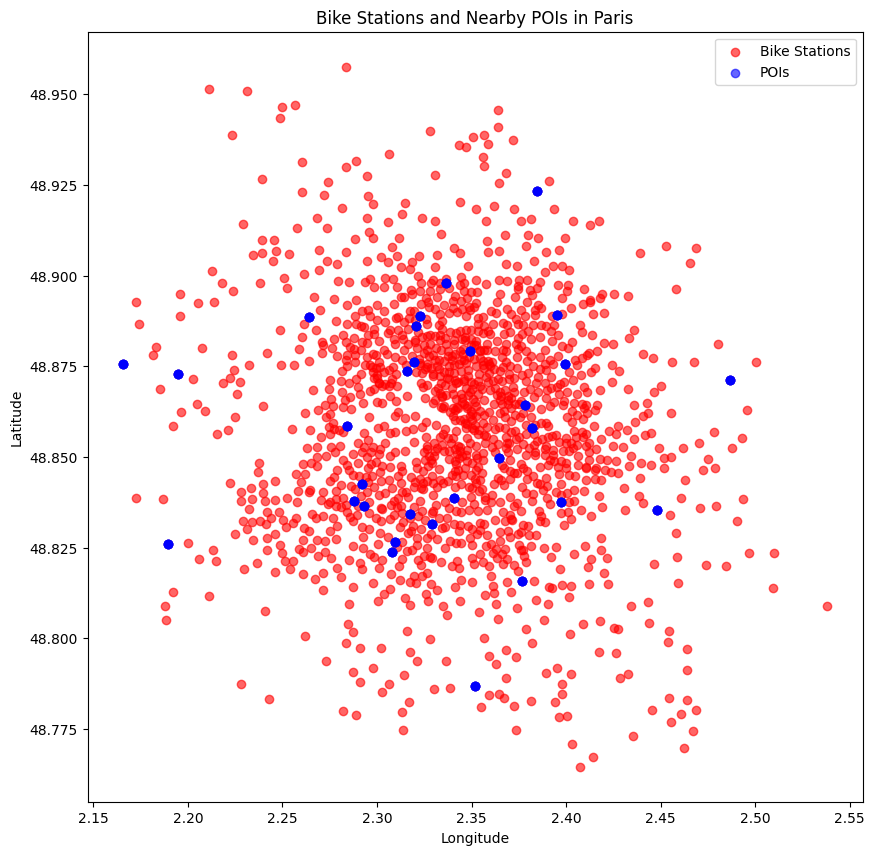

         station_name   latitude  longitude  free_bikes  \
0  Argenson - Château  48.888559     2.2642          21   
1  Argenson - Château  48.888559     2.2642          21   
2  Argenson - Château  48.888559     2.2642          21   
3  Argenson - Château  48.888559     2.2642          21   
4  Argenson - Château  48.888559     2.2642          21   

              venue_name  venue_rating  \
0             Bustronome           4.5   
1  La Table des Oliviers           4.3   
2      Léon de Bruxelles           3.9   
3             FrogBurger           4.5   
4   Le Chalet de Neuilly           4.0   

                                       venue_address  venue_distance  \
0               2 avenue Kléber, 75116 Paris, France     2800.624423   
1  4 rue de l'Eglise, 92200 Neuilly Sur Seine, Fr...      419.710528   
2  95 boulevard Gouvion Saint Cyr, 75017 Paris, F...     1845.469007   
3  150 avenue Charles de Gaulle, 92200 Neuilly-su...      478.621497   
4  14 Rue du Commandant Pilot, 9

In [23]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# --- Part 1: Getting Bike Stations Data (CityBike API) ---
def get_bike_stations():
    # CityBike API for networks
    networks_url = "https://api.citybik.es/v2/networks"
    networks_response = requests.get(networks_url)
    networks_data = networks_response.json()

    # Find the network for Paris (Velib)
    paris_network = next(net for net in networks_data['networks'] if 'velib' in net['id'])
    paris_network_url = f"https://api.citybik.es/v2/networks/{paris_network['id']}"

    # Get full data for Paris
    paris_data = requests.get(paris_network_url).json()

    # Extract stations list from the data
    stations = paris_data['network']['stations']

    # Get relevant details: name, latitude, longitude, number of free bikes
    parsed_stations = [
        {
            'name': station['name'],
            'latitude': station['latitude'],
            'longitude': station['longitude'],
            'free_bikes': station['free_bikes']
        }
        for station in stations
    ]

    # Create DataFrame for bike stations
    df_bike_stations = pd.DataFrame(parsed_stations)
    df_bike_stations.to_csv('paris_bike_stations.csv', index=False)

    return df_bike_stations

# --- Part 2: Loading Nearby Places Data (Yelp and Foursquare) ---
def load_pois_data():
    # Load the CSV files containing Yelp and Foursquare data
    df_yelp = pd.read_csv('yelp_nearby_places.csv')  # Yelp nearby places
    df_foursquare = pd.read_csv('foursquare_nearby_places.csv')  # Foursquare nearby places

    # Standardize column names to make the merge easier
    df_yelp = df_yelp.rename(columns={
        'station_name': 'station_name',
        'business_name': 'venue_name',
        'rating': 'venue_rating',
        'address': 'venue_address',
        'distance': 'venue_distance',
        'category': 'venue_category',
    })

    df_foursquare = df_foursquare.rename(columns={
        'station_name': 'station_name',
        'venue_name': 'venue_name',
        'venue_address': 'venue_address',
        'venue_distance': 'venue_distance',
        'venue_latitude': 'latitude',
        'venue_longitude': 'longitude',
    })

    return df_yelp, df_foursquare

# --- Part 3: Merging Data ---
def merge_data(df_bike_stations, df_yelp, df_foursquare):
    # Rename the 'name' column in bike stations to 'station_name' for merging
    df_bike_stations = df_bike_stations.rename(columns={'name': 'station_name'})

    # Merge the Yelp and Foursquare data with bike stations based on 'station_name'
    combined_data_yelp = pd.merge(df_bike_stations, df_yelp, on=['station_name'], how='inner')
    combined_data_foursquare = pd.merge(df_bike_stations, df_foursquare, on=['station_name'], how='inner')

    # Combine Yelp and Foursquare data into one dataset
    combined_data = pd.concat([combined_data_yelp, combined_data_foursquare], ignore_index=True)

    # Save the combined data to a new CSV file
    combined_data.to_csv('combined_bike_poi_data.csv', index=False)

    return combined_data

# --- Part 4: Visualizing the Data on a Simple Plot ---
def plot_bike_and_pois_on_map(df_bike_stations, df_pois):
    # Create a figure for the plot
    plt.figure(figsize=(10, 10))

    # Plot bike stations
    plt.scatter(df_bike_stations['longitude'], df_bike_stations['latitude'], color='red', label="Bike Stations", alpha=0.6)

    # Plot POIs (Yelp and Foursquare combined data)
    plt.scatter(df_pois['longitude'], df_pois['latitude'], color='blue', label="POIs", alpha=0.6)

    # Set plot labels and title
    plt.title('Bike Stations and Nearby POIs in Paris')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    # Show plot
    plt.show()

# --- Main Function to Execute All Parts ---
def main():
    # Part 1: Get Bike Stations Data
    df_bike_stations = get_bike_stations()

    # Part 2: Load Yelp and Foursquare POIs data
    df_yelp, df_foursquare = load_pois_data()

    # Part 3: Merge the data (Bike stations with Yelp and Foursquare)
    combined_data = merge_data(df_bike_stations, df_yelp, df_foursquare)

    # Part 4: Visualize on a simple plot
    plot_bike_and_pois_on_map(df_bike_stations, combined_data)

    # Print first few rows of combined data
    print(combined_data.head())

# Execute the main function
main()


In [13]:
import pandas as pd
import os

# List files in the current directory to ensure your CSVs are there
print(os.listdir())  # Check if the files are in the same folder

# Load the data
df_bike_stations = pd.read_csv('paris_bike_stations.csv')  # Replace with your actual file names
df_yelp = pd.read_csv('yelp_nearby_places.csv')  # Replace with your actual file names
df_foursquare = pd.read_csv('foursquare_nearby_places.csv')  # Replace with your actual file names

# Now print the column names of each DataFrame
print(df_bike_stations.columns)  # Check columns for bike stations
print(df_yelp.columns)           # Check columns for Yelp
print(df_foursquare.columns)     # Check columns for Foursquare


['.gitkeep', 'city_bikes.ipynb', 'combined_bike_poi_data.csv', 'data', 'foursquare_nearby_places.csv', 'joining_data.ipynb', 'model_building.ipynb', 'paris_bike_stations.csv', 'yelp_foursquare_EDA.ipynb', 'yelp_nearby_places.csv', 'yelp_vs_foursquare_comparison.csv']
Index(['station_name', 'latitude', 'longitude', 'free_bikes'], dtype='object')
Index(['station_name', 'business_name', 'rating', 'address', 'distance',
       'category'],
      dtype='object')
Index(['station_name', 'venue_name', 'venue_address', 'venue_distance',
       'venue_latitude', 'venue_longitude'],
      dtype='object')


Look at the data before and after the join to validate your data.

In [28]:
import pandas as pd

# Load the data (assuming the files are in the same directory)
df_bike_stations = pd.read_csv('paris_bike_stations.csv')
df_yelp = pd.read_csv('yelp_nearby_places.csv')
df_foursquare = pd.read_csv('foursquare_nearby_places.csv')

# Clean column names to ensure no leading/trailing spaces
df_bike_stations.columns = df_bike_stations.columns.str.strip()
df_yelp.columns = df_yelp.columns.str.strip()
df_foursquare.columns = df_foursquare.columns.str.strip()

# Before the merge, check the data in each dataframe
print("Before the merge:")
print("\nBike Stations Data (df_bike_stations):")
print(df_bike_stations.head())  # Display first 5 rows of bike stations data

print("\nYelp Data (df_yelp):")
print(df_yelp.head())  # Display first 5 rows of Yelp data

print("\nFoursquare Data (df_foursquare):")
print(df_foursquare.head())  # Display first 5 rows of Foursquare data

# Rename 'Bike station' to 'station_name' in df_bike_stations to match the others
df_bike_stations.rename(columns={'name': 'station_name'}, inplace=True)

# After renaming, check the column names
print("\nColumns in df_bike_stations after renaming:")
print(df_bike_stations.columns)

# Merge the datasets on 'station_name'
combined_data_yelp = pd.merge(df_bike_stations, df_yelp, on='station_name', how='inner')
combined_data_foursquare = pd.merge(df_bike_stations, df_foursquare, on='station_name', how='inner')

# After the merge, check the shape and first few rows of the combined datasets
print("\nAfter the merge:")
print("\nCombined Data (Yelp):")
print(combined_data_yelp.head())  # Display first 5 rows of merged data (Yelp)

print("\nCombined Data (Foursquare):")
print(combined_data_foursquare.head())  # Display first 5 rows of merged data (Foursquare)

# Combine both Yelp and Foursquare merged data into a single dataframe
combined_data = pd.concat([combined_data_yelp, combined_data_foursquare], ignore_index=True)

# Check the final combined dataset
print("\nFinal Combined Data (Yelp + Foursquare):")
print(combined_data.head())  # Display first 5 rows of the final combined data

# Check the shape of the final combined dataset to see how many rows/columns it has
print("\nShape of Final Combined Data:")
print(combined_data.shape)  # This will show you the number of rows and columns


Before the merge:

Bike Stations Data (df_bike_stations):
                                name   latitude  longitude  free_bikes
0                 Argenson - Château  48.888559   2.264200          21
1             Saint Lambert - Blomet  48.836591   2.293056           2
2            Saint-Maur - République  48.864186   2.378317           2
3          Mairie de Rosny-sous-Bois  48.871257   2.486581          19
4  Mouton Duvernet - Général Leclerc  48.831633   2.329312           1

Yelp Data (df_yelp):
         station_name          business_name  rating  \
0  Argenson - Château             Bustronome     4.5   
1  Argenson - Château  La Table des Oliviers     4.3   
2  Argenson - Château      Léon de Bruxelles     3.9   
3  Argenson - Château             FrogBurger     4.5   
4  Argenson - Château   Le Chalet de Neuilly     4.0   

                                             address     distance  \
0               2 avenue Kléber, 75116 Paris, France  2800.624423   
1  4 rue de l'Eglis